<a href="https://colab.research.google.com/github/srujana-koripalli/DM-DimensionalityTechniques-/blob/main/DM_Assignment2_ImageDat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import fetch_olivetti_faces
# Load the data
data = fetch_olivetti_faces()
data.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [ ]:
inputs=data.data
target=data.target
images=data.images

In [ ]:
target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

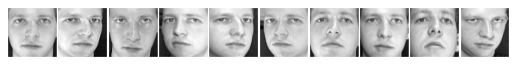

In [ ]:
fig, axes = plt.subplots(1,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i],cmap="gray")

**PCA**

In [ ]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
faces_pca = PCA(n_components=0.8)
faces_pca.fit(inputs)

PCA(n_components=0.8)

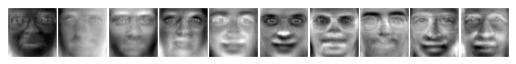

In [ ]:
fig, axes = plt.subplots(1,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(faces_pca.components_[i].reshape(64,64),cmap="gray")

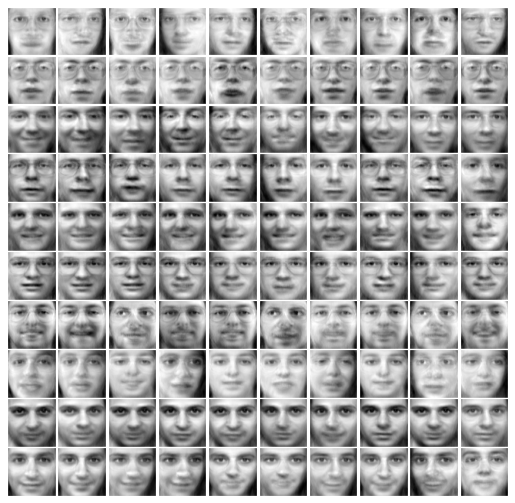

In [ ]:
components = faces_pca.transform(inputs)
projected = faces_pca.inverse_transform(components)

fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(64,64),cmap="gray")

**t-SNE**

In [ ]:
def TSNE(n, df,target):
  from sklearn.manifold import TSNE
  model = TSNE(n_components = n, random_state = 42,verbose=0, perplexity=40, n_iter=400)
  tsne_data = model.fit_transform(df)
  print(tsne_data.shape)
  tsne_data = np.vstack((tsne_data.T, target)).T 
  return tsne_data

In [ ]:
tsne_data = TSNE(2, inputs, target)
tsne_Idf = pd.DataFrame(tsne_data)
tsne_Idf

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(400, 2)


,0,1,2
0,12.573973,-5.517671,0.0
1,11.860751,15.430540,0.0
2,12.154913,-5.920110,0.0
3,11.027962,7.582700,0.0
4,12.731546,14.518966,0.0
...,...,...,...
395,-6.751878,3.247428,39.0
396,10.630562,5.765073,39.0
397,-7.602188,3.588792,39.0
398,10.718883,6.066850,39.0


In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(
        x = tsne_Idf.iloc[:,0],
        y = tsne_Idf.iloc[:,1],
        mode='markers',
        hovertext= tsne_Idf.iloc[:,2],
        #showlegend=True,
        marker=dict(
            size=10,
            color=tsne_Idf.iloc[:,2], #set color equal to a variable
            colorscale = 'Viridis', # one of plotly colorscales
            
            showscale=True,
            opacity=1,
            line_width=1
        )
    ))
  # figure layout
fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=1000,height=500)
fig.layout.template = 'plotly_dark' 
    
fig.show()

**SVD**

In [ ]:
uI, sI, vI = np.linalg.svd(inputs, full_matrices=True)

In [ ]:
variance_Iexplained = np.round(sI**2/np.sum(sI**2), decimals=3)
variance_Iexplained

array([0.954, 0.008, 0.005, 0.003, 0.002, 0.002, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ,

In [ ]:
rowI=list(range(1,len(variance_Iexplained)+1))

fig = go.Figure(data=[go.Bar(
    x=rowI,
    y=variance_Iexplained)
])
  
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     step="day",
                     stepmode="backward"),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
    )
)

fig.layout.template = 'plotly_dark' 
# fig.show()



In [ ]:
col_labels= ['SVD_Column'+str(i) for i in range(1,5)]
svd_Idf = pd.DataFrame(uI[:,0:4], index=target.tolist(), columns=col_labels)
svd_Idf

,SVD_Column1,SVD_Column2,SVD_Column3,SVD_Column4
0,-0.057472,-0.011339,-0.042208,-0.001126
0,-0.053238,0.095397,0.030453,-0.107423
0,-0.056393,0.005018,-0.008531,0.003270
0,-0.051981,-0.177098,0.004506,0.008899
0,-0.055553,0.036166,0.060671,-0.052672
...,...,...,...,...
39,-0.048470,0.016360,0.057307,-0.024853
39,-0.054669,-0.100393,-0.003883,-0.006025
39,-0.047664,0.030239,0.070947,-0.041041
39,-0.053866,-0.133649,-0.015209,-0.005910


In [ ]:
svd_Idf=svd_Idf.reset_index()
svd_Idf.rename(columns={'index':'Label'}, inplace=True)
svd_Idf.head

<bound method NDFrame.head of      Label  SVD_Column1  SVD_Column2  SVD_Column3  SVD_Column4
0        0    -0.057472    -0.011339    -0.042208    -0.001126
1        0    -0.053238     0.095397     0.030453    -0.107423
2        0    -0.056393     0.005018    -0.008531     0.003270
3        0    -0.051981    -0.177098     0.004506     0.008899
4        0    -0.055553     0.036166     0.060671    -0.052672
..     ...          ...          ...          ...          ...
395     39    -0.048470     0.016360     0.057307    -0.024853
396     39    -0.054669    -0.100393    -0.003883    -0.006025
397     39    -0.047664     0.030239     0.070947    -0.041041
398     39    -0.053866    -0.133649    -0.015209    -0.005910
399     39    -0.050787    -0.037421     0.025013    -0.015964

[400 rows x 5 columns]>

In [ ]:
fig = go.Figure(data=go.Scatter(
        x = svd_Idf.iloc[:,1],
        y = svd_Idf.iloc[:,2],
        mode='markers',
        hovertext= svd_Idf.iloc[:,0],
        marker=dict(
            size=8,
            color=svd_Idf.iloc[:,0], #set color equal to a variable
            colorscale = 'Viridis', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=1000,height=500)                 
fig.layout.template = 'plotly_dark' 
    
fig.show()

**ISOMAP**

In [ ]:
from sklearn.manifold import Isomap

def ISOMAP(n, df,target):
  model = Isomap(n_components=n)
  isomap_df=model.fit_transform(df)
  isomap_df.shape
  col_labels= ['ISO'+str(i) for i in range(1,n+1)]
  isomap_df  = pd.DataFrame(isomap_df[:,0:n], index=target.tolist(), columns=col_labels)
  isomap_df=isomap_df.reset_index()
  isomap_df.rename(columns={'index':'Label'}, inplace=True)
  return isomap_df


isomap_Idf = ISOMAP(2,inputs,target)
isomap_Idf

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:322: UserWarning:

The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/

,Label,ISO1,ISO2
0,0,-19.671829,-1.777261
1,0,-10.238550,-8.300554
2,0,-19.185409,-6.021852
3,0,1.475908,2.736304
4,0,-17.321627,0.861024
...,...,...,...
395,39,5.291675,-0.488860
396,39,-2.425828,2.956596
397,39,1.052052,-0.410125
398,39,-0.584769,1.244189


**UMAP**

In [ ]:
pip install umap-learn

     |████████████████████████████████| 86 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 20.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=111f03ab386a904e741bd01c0a647c69a214c055c0a0d3ac0e43250e24949c1a
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=14182b3a2ad7bd9ebf5d1a81ebb5c940d844ccf690401facfb79c3875f876a89
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import umap.umap_ as umap

def UMAP(n,df, target):
  umap_op = umap.UMAP(n_components=n)
  umap_df = umap_op.fit_transform(df)
  col_labels= ['UMAP'+str(i) for i in range(1,n+1)]
  umap_df  = pd.DataFrame(umap_df[:,0:n], index=target.tolist(), columns=col_labels)
  umap_df=umap_df.reset_index()
  umap_df.rename(columns={'index':'Label'}, inplace=True)
  return umap_df

umap_Idf = UMAP(2,inputs,target)
umap_Idf


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



,Label,UMAP1,UMAP2
0,0,8.570164,4.037741
1,0,6.676533,2.843313
2,0,8.439781,4.098417
3,0,7.404129,6.864552
4,0,6.756002,2.965626
...,...,...,...
395,39,4.921463,5.106306
396,39,7.466694,6.440236
397,39,4.997269,5.037604
398,39,7.403201,6.551698


In [ ]:
fig = go.Figure(data=go.Scatter(
        x = umap_Idf.iloc[:,1],
        y = umap_Idf.iloc[:,2],
        mode='markers',
        hovertext= umap_Idf.iloc[:,0],
        marker=dict(
            size=10,
            color=umap_Idf.iloc[:,0], #set color equal to a variable
            colorscale = 'Viridis', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=1000,height=500)                 
fig.layout.template = 'plotly_dark' 
    
fig.show()

 LLE

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding as LLE

def LLE(n, df, target):
  lle_op = LLE(n_components=n)
  lle_df = lle_op.fit_transform(df)
  col_labels= ['LLE'+str(i) for i in range(1,n+1)]
  lle_df  = pd.DataFrame(lle_df[:,0:n], index=target.tolist(), columns=col_labels)
  lle_df= lle_df.reset_index()
  lle_df.rename(columns={'index':'Label'}, inplace=True)
  return lle_df
  
lle_Idf = LLE(2,inputs,target)
lle_Idf

,Label,LLE1,LLE2
0,0,0.000059,0.054926
1,0,-0.000013,0.053448
2,0,0.000062,0.055069
3,0,0.000064,0.055159
4,0,0.000030,0.054334
...,...,...,...
395,39,0.000061,0.055001
396,39,0.000060,0.054967
397,39,0.000063,0.055106
398,39,0.000062,0.055067


In [ ]:
fig = go.Figure(data=go.Scatter(
        x = lle_Idf.iloc[:,1],
        y = lle_Idf.iloc[:,2],
        mode='markers',
        hovertext= lle_Idf.iloc[:,0],
        marker=dict(
            size=10,
            color=lle_Idf.iloc[:,0], #set color equal to a variable
            colorscale = 'Viridis', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=1000,height=500)                 
fig.layout.template = 'plotly_dark' 
    
fig.show()